In [13]:
! pip install tabulate

In [14]:
import pandas as pd
import sqlite3
from tabulate import tabulate  

# Load dataset
df = pd.read_csv("../population_panel_clean.csv")

# Rename columns
df = df.rename(columns={
    "lifeexp": "LifeExpectancy",
    "u5mort": "U5Mortality",
    "adofert": "AdoleFertility"
})

# Create SQLite in-memory DB
conn = sqlite3.connect(":memory:")
df.to_sql("population", conn, index=False, if_exists="replace")

# SQL queries for descriptive statistics
queries = {
    "Total Rows": "SELECT COUNT(*) AS total_rows FROM population;",
    "Year Range": "SELECT MIN(year) AS start_year, MAX(year) AS end_year FROM population;",
    "Average Life Expectancy": "SELECT ROUND(AVG(LifeExpectancy), 2) AS avg_lifeexp FROM population;",
    "Average U5 Mortality": "SELECT ROUND(AVG(U5Mortality), 2) AS avg_u5mort FROM population;",
    "Average Adolescent Fertility": "SELECT ROUND(AVG(AdoleFertility), 2) AS avg_fertility FROM population;",
    "Number of Countries": "SELECT COUNT(DISTINCT country_name) AS total_countries FROM population;",
    "Average Years per Country": """
        SELECT ROUND(AVG(entry_count), 2) AS avg_years_per_country
        FROM (
            SELECT country_name, COUNT(*) AS entry_count
            FROM population
            GROUP BY country_name
        );
    """
}

# Execute queries and collect results
summary_table = []
for label, query in queries.items():
    result = pd.read_sql(query, conn)
    value = result.iloc[0, 0]
    summary_table.append([label, value])

# Print results in table format
print(tabulate(summary_table, headers=["Statistic", "Value"], tablefmt="fancy_grid"))

# Close the DB connection
conn.close()



╒══════════════════════════════╤══════════╕
│ Statistic                    │    Value │
╞══════════════════════════════╪══════════╡
│ Total Rows                   │ 11536    │
├──────────────────────────────┼──────────┤
│ Year Range                   │  1960    │
├──────────────────────────────┼──────────┤
│ Average Life Expectancy      │    64.93 │
├──────────────────────────────┼──────────┤
│ Average U5 Mortality         │    73.06 │
├──────────────────────────────┼──────────┤
│ Average Adolescent Fertility │    73.58 │
├──────────────────────────────┼──────────┤
│ Number of Countries          │   195    │
├──────────────────────────────┼──────────┤
│ Average Years per Country    │    59.16 │
╘══════════════════════════════╧══════════╛


In [15]:
# Select the variables of interest
columns_of_interest = ["LifeExpectancy", "U5Mortality", "AdoleFertility"]

# descriptive statistics
summary_stats = df[columns_of_interest]

# 25%, 50% (median), and 75% quantiles
summary_stats.describe()

,LifeExpectancy,U5Mortality,AdoleFertility
count,11536.000000,11536.000000,11536.000000
mean,64.926722,73.056371,73.577752
std,11.079288,78.118620,52.714072
min,10.989000,1.400000,0.512000
25%,57.946750,16.200000,28.087000
50%,67.283000,41.600000,63.224000
75%,73.073598,105.025000,112.392000
max,86.372000,767.400000,229.604000


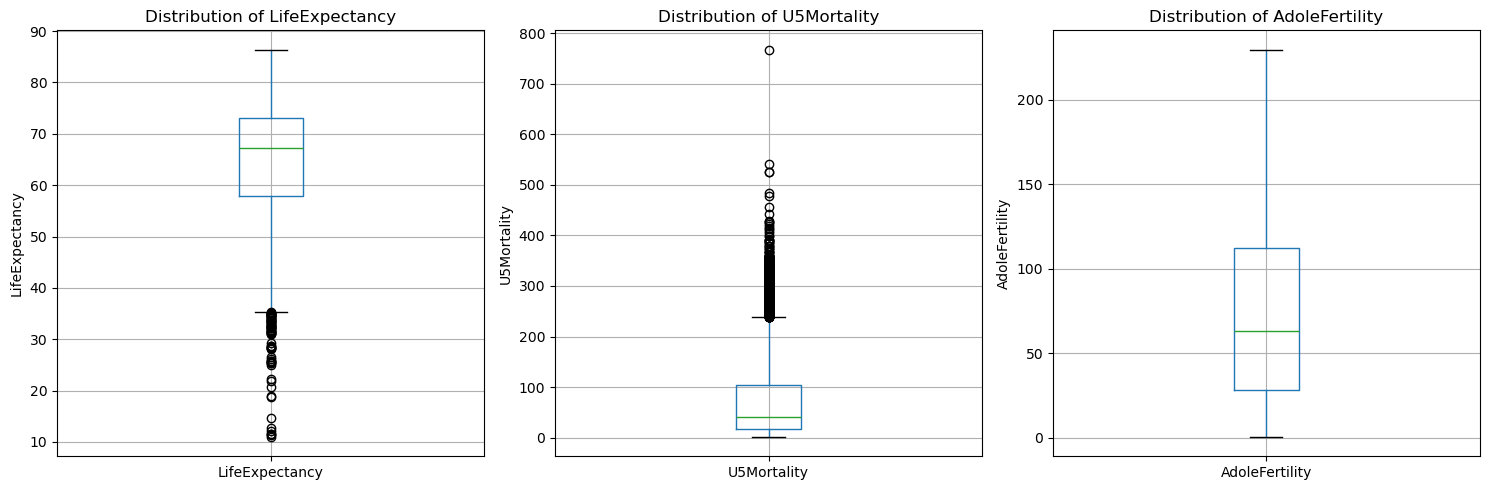

In [17]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Set up the figure with 3 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop over the columns and axes
for ax, col in zip(axes, columns_of_interest):
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel(col)  # Each y-axis label matches the variable
    ax.grid(True)

plt.tight_layout()
plt.show()
